## Figure 6 - The depth PDF of shallow sources at Shinmoe-dake

In [1]:
%matplotlib inline
import os
import h5py
import numpy as np
import scipy.io as sio
from matplotlib import pyplot as plt, ticker
from mintpy.utils import ptime, readfile, writefile, utils as ut, plot as pp
from mintpy.defaults.plot import *

work_dir = os.path.expanduser('~/Documents/Paper/2019_Kirishima/figs_src/model_PDF')
os.chdir(work_dir)
print('Go to directory', work_dir)

def get_mKeep(inv_file, par_index, burning=1e5, blankCells=9999, offset=695, scale=1):
    """ Get the estimation of the parameter
    Parameters: inv_file : GBIS inversion result mat file
                par_index : index of the parameter, starting from 0
                burning : number of iterations to ignore in pdf histogram plot
                blankCells : Number of empty cells at the end of mKeep and pKeep
                offset : reference height
    Returns:    mKeep : 1D np.ndarray of all the estimation of the parameter
                optimal : the optional value
    """
    mat = sio.loadmat(inv_file, struct_as_record=False, squeeze_me=True)
    mKeep = mat['invResults'].mKeep[par_index, int(burning):-blankCells]
    optimal = mat['invResults'].model.optimal[par_index]

    # if parameter is depth
    if par_index == 2:
        mKeep -= offset
        mKeep *= -1       # a.s.l.

        optimal -= offset
        optimal *= -1

    mKeep *= scale
    optimal *= scale
    return mKeep, optimal

## Read data
inv_dir_base = os.path.expanduser('~/insarlab/Kirishima/Model')
inv_file_pre2017  = os.path.join(inv_dir_base, 'ShinmoePre2017/invert_1_T/invert_1_T.mat')
inv_file_post2008 = os.path.join(inv_dir_base, 'ShinmoePost2008/invert_1_2_C/invert_1_2_C.mat')

depths_pre2017, depths_pre2017_optimal = get_mKeep(inv_file_pre2017, par_index=2, burning=100000)
depths_post2008, depths_post2008_optimal = get_mKeep(inv_file_post2008, par_index=2, burning=10000)

Go to directory /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/model_PDF


save figure to /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/model_PDF/model_PDF.png


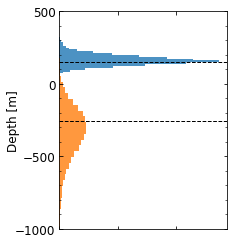

In [2]:
## plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[3, 4])
for depths, depth_optimal in zip([depths_post2008, depths_pre2017],
                                 [depths_post2008_optimal, depths_pre2017_optimal]):
    ax.hist(depths, bins=50, alpha=0.8, orientation='horizontal', density=True)
    ax.axhline(y=depth_optimal, c='k', linestyle='--', linewidth=1) # plot optimal value

# axis format
ax.yaxis.set_major_locator(ticker.MultipleLocator(500))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)
ax.set_xticklabels([])
ax.set_ylim(-1000, 500)
ax.set_ylabel('Depth [m]', fontsize=font_size, labelpad=-5) #, y=0.66)

# output
out_file = os.path.abspath('model_PDF.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to', out_file)
plt.show()